<div style="border:solid green 2px; padding: 20px">
<b>Hello, Kamil!</b>

My name is Grigoriy Gusarov and I'm going to review your project.

My main goal is not to show that any mistakes have been made somewhere, but to share my experience that will help you in your further work. Further in the file you can see my comments, try to take them into account when performing the next tasks. **Please, don't delete them.**


You can find my comments in <font color='green'>green</font>, <font color='orange'>yellow</font> or <font color='red'>red</font> boxes like this:

<div class="alert alert-success">
<b>Reviewer's comment:</b> if everything is done succesfully
</div>

<div class="alert alert-warning">
<b>Reviewer's comment: </b> if I can give some recommendations
</div>

<div class="alert alert-danger">
<b>Reviewer's comment:</b> if the block requires some corrections. Work can't be accepted with the red comments.
</div>

    
Let's work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track the changes if you highlight your comments:
    
<div class="alert alert-info"> <b>Student's comment:</b> For example like this.</div>

### <font color='orange'>General feedback</font>
Thank you for sending your project! Great job, you've definitely gone the extra mile. I've especially like your conclusions and very detailed notebook formatting. There're several minor issues below, but all of them are easily fixable.

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Additional links:
    <ul>
        <li>Different prioritization frameworks overview: <a>https://uxdesign.cc/how-to-choose-your-product-prioritization-framework-ff0320d63ebf</a></li>
        <li>Advanced ML technics for the anomaly detection: <a>https://medium.com/learningdatascience/anomaly-detection-techniques-in-python-50f650c75aaf</a></li>
        <li>AB testing guide: <a>https://www.shopify.com/blog/the-complete-guide-to-ab-testing</a></li>
        <li>Main parametric and non-parametric tests overview: <a>https://keydifferences.com/difference-between-parametric-and-nonparametric-test.html</a></li>
    </ul>
</div>

---

# Online Store

# Table of contents

1. [Project Description](#ProjectDescription)
2. [Step 0: Open data and general information](#OpenData&GeneralInfo)
4. [Part 1: Prioritizing Hypotheses](#Part1)
6. [Part 2: A/B Test Analysis](#Part2)

### Project Description. <a name="ProjectDescription"></a>

|  Name  |  Description  |
| :----: |  :---- |
|  **Initial conditions**  | Together with the marketing department, you've compiled a list of hypotheses that may help boost revenue.                  | 
|  **What we have**        | Hypotheses dataset, orders, visits on the date specified in the A/B test group specified                                   |
|  **Main question of project**  |  You need to prioritize these hypotheses, launch an A/B test, and analyze the results.                               |
| **Project Description**  | [Link to Project Description](https://practicum.yandex.com/trainer/data-analyst/lesson/da301f15-cfdb-4ac1-ba36-0872df8f9cf5/task/eb50e373-a61a-4206-89a3-49095515f6a7/)    |
| **Datasets**             | [/datasets/visits_log_us.csv](https://code.s3.yandex.net/datasets/visits_log_us.csv)  |
|                          | [/datasets/orders_log_us.csv](https://code.s3.yandex.net/datasets/orders_log_us.csv)  |
|                          | [/datasets/costs_us.csv](https://code.s3.yandex.net/datasets/costs_us.csv)            |

<div class="alert alert-success">
<b>Reviewer's comment:</b> 👍
</div>

### Step 1. Open the data file and study the general information. <a name="OpenData&GeneralInfo"></a>

In [35]:
# import all packages
import pandas as pd
import numpy as np
import random
import scipy.stats as stats
import sys

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

%matplotlib inline

In [38]:
print('Pandas version library:',pd.__version__)
print('Numpy version library:', np.__version__)
print('Seaborn version library:', sns.__version__)
print('Anaconda version package:', sys.version)

Pandas version library: 0.25.1
Numpy version library: 1.19.5
Seaborn version library: 0.9.0
Anaconda version package: 3.7.8 | packaged by conda-forge | (default, Nov 17 2020, 23:45:15) 
[GCC 7.5.0]


<div class="alert alert-warning">
<b>Reviewer's comment:</b> You can check python version with: 
<code>
import sys
sys.version
</code>
</div>


In [4]:
hypotheses = pd.read_csv('https://code.s3.yandex.net//datasets/hypotheses_us.csv', ';')
df_orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_us.csv', sep=',')
df_visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_us.csv', sep=',')

In [5]:
# function to determine if columns in file have null values:
def get_percent_of_na(df, num):
    count = 0; # first reset counter.
    df = df.copy() # copy dataframe in new structure.
    amount = (df.isna().sum() / df.shape[0])
    
    for column, percent in zip(amount.index, amount.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent, num, num_of_nulls))
        
    if count != 0:
        print('\033[1m' + 'There are {} columns with NA.'.format(count) + '\033[0m')
    else: 
        print()
        print('\033[1m' + 'There are no columns with NA.' + '\033[0m')

In [6]:
def get_percent_of_na_table(df, num):
    df_nulls = pd.DataFrame(df.isna().sum(), columns=['Missing Values'])
    df_nulls['Percent of Nulls'] = round(df_nulls['Missing Values'] / df.shape[0], num) * 100
    return df_nulls

In [7]:
# function to display helpfull information about each file.
def get_info(df):
    print('Head:')
    display(df.head())
    print('-'*110)
    
    print('Info:')
    display(df.info())
    print('-'*110)
    
    print('Describe:')
    display(df.describe())
    display(df.describe(include=['category', 'object', 'float64']))
    print('-'*110)
    
    print('Percent of columns with nulls:')
    display(get_percent_of_na_table(df, 2))
    print('-'*110)
    
    print('Shape:')
    print(df.shape)
    print('-'*110)
    
    print('Duplicated:')
    print('\033[1m' + 'We have {} duplicated rows. \n'.format(df.duplicated().sum()) + '\033[0m')
    print('/'*110)

In [8]:
get_info(df_orders)

Head:


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


--------------------------------------------------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null float64
group            1197 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


None

--------------------------------------------------------------------------------------------------------------
Describe:


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


,date,revenue,group
count,1197,1197.000000,1197
unique,31,NaN,2
top,2019-08-05,NaN,B
freq,48,NaN,640
mean,NaN,131.491646,NaN
std,NaN,603.004729,NaN
min,NaN,5.000000,NaN
25%,NaN,20.800000,NaN
50%,NaN,50.200000,NaN
75%,NaN,130.400000,NaN


--------------------------------------------------------------------------------------------------------------
Percent of columns with nulls:


,Missing Values,Percent of Nulls
transactionId,0,0.0
visitorId,0,0.0
date,0,0.0
revenue,0,0.0
group,0,0.0


--------------------------------------------------------------------------------------------------------------
Shape:
(1197, 5)
--------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows. 

//////////////////////////////////////////////////////////////////////////////////////////////////////////////


In [9]:
get_info(df_visits)

Head:


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


--------------------------------------------------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null object
group     62 non-null object
visits    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

--------------------------------------------------------------------------------------------------------------
Describe:


,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


,date,group
count,62,62
unique,31,2
top,2019-08-15,B
freq,2,31


--------------------------------------------------------------------------------------------------------------
Percent of columns with nulls:


,Missing Values,Percent of Nulls
date,0,0.0
group,0,0.0
visits,0,0.0


--------------------------------------------------------------------------------------------------------------
Shape:
(62, 3)
--------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows. 

//////////////////////////////////////////////////////////////////////////////////////////////////////////////


- [X] Make sure to preprocess the data. There might be mistakes in the original datasets; for example, some of the visitors might have gotten into both group A and group B.

In [10]:
df_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [27]:
users_of_groups = df_orders.groupby('visitorId').agg({'group':'nunique'}).reset_index()
users_of_groups.columns = ['visitorId','users_both_groups']
users_of_groups.head()

,visitorId,users_both_groups
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


In [33]:
both_groups = users_of_groups[users_of_groups['users_both_groups'] == 2]
print('This users appear in boths groups A and B:')
display(both_groups)

This users appear in boths groups A and B:


,visitorId,users_both_groups
2,8300375,2
44,199603092,2
51,232979603,2
55,237748145,2
66,276558944,2
84,351125977,2
97,393266494,2
114,457167155,2
119,471551937,2
122,477780734,2


<div class="alert alert-danger">
<b>Reviewer's comment:</b> Unfortunately, this step can't handle shared users issue. If you want to detect such users, you need to group your data by user id and count unique groups amount. 
</div>

* The data is very clean. There are no missing values or duplicate values.
* We have 8 hypotheses.
* To avoid situation that some of the visitors might have gotten into both group A and group B, I removed visitors from both group A and group B.

### Part 1. Prioritizing Hypotheses <a name="Part1"></a>
The file hypotheses_us.csv contains nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence, and Effort specified for each.
#### The task is to:
- Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.
- Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.
- Show how the prioritization of hypotheses changes when you use RICE instead of ICE . Provide an explanation for the changes.

In [58]:
display(hypotheses)

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


<div class="alert alert-warning">
<b>Reviewer's comment: </b> Small tip: you can customize the dataframe so that the hypotheses are fully displayed. To do this, use this setting after importing the pandas library: <code>pd.set_option('max_colwidth', 400)</code>
</div>

In [59]:
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
display(hypotheses[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,Hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


In [60]:
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
display(hypotheses[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


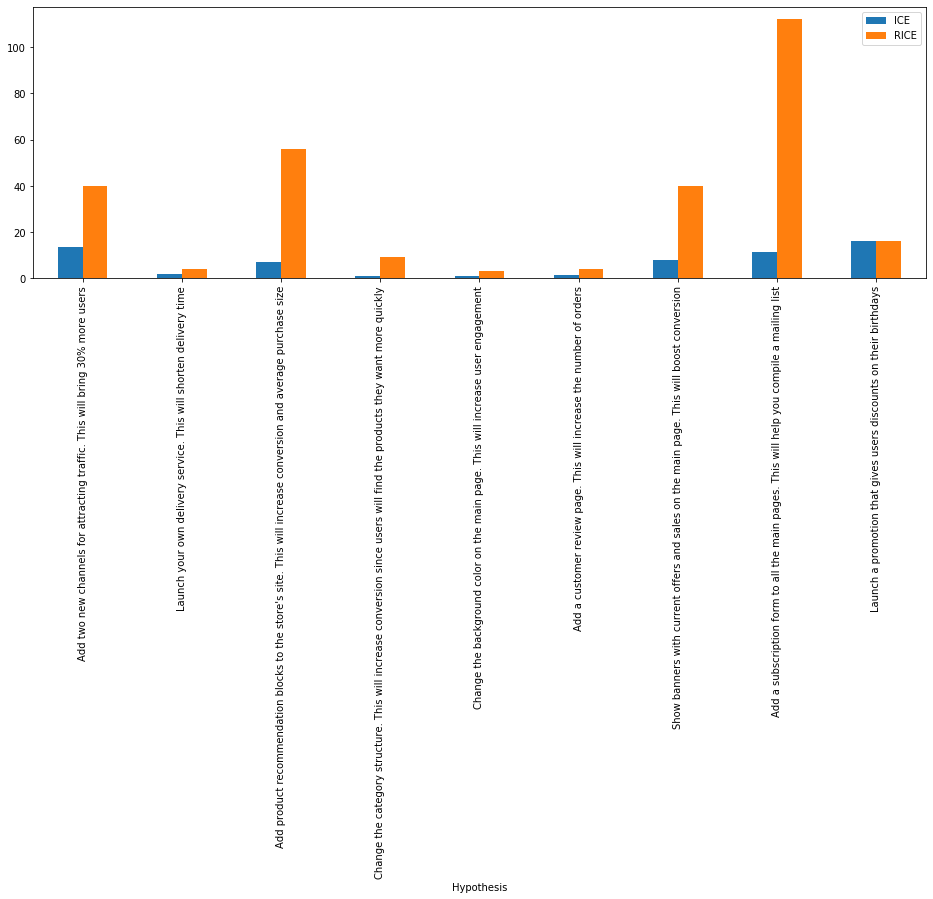

In [61]:
hypotheses.plot(
    x='Hypothesis',
    y=['ICE', 'RICE'],
    kind='bar',
    figsize=(16,5))
plt.show()

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Good work! You can reinforce this research subpart with ICE/RICE scatter plot. ICE and RICE would be the axes and charts would be annotated by hypotheses indices. You can find a template here: <a>https://stackoverflow.com/a/14434334/11664121</a>
</div>

* According to the sorted tables and graphs, you can see that for framework ICE, hypothesis number 8 has the highest rating.
* And for framework RICE, hypothesis number 7 has the highest rating.

### Part 2. A/B Test Analysis <a name="Part2"></a>

- [X] Graph cumulative revenue by group. Make conclusions and conjectures.

In [62]:
grouped_data = df_orders[['date', 'group']].drop_duplicates()
grouped_data.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [63]:
df_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [64]:
# getting aggregated cumulative daily data on orders
orders_agg = grouped_data.apply(
    lambda x: df_orders[np.logical_and(df_orders['date'] <= x['date'], df_orders['group'] == x['group'])].agg({
    'date' : 'max',
    'group' : 'max',
    'transactionId' : pd.Series.nunique,
    'visitorId' : pd.Series.nunique,
    'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']
)

In [65]:
orders_agg.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,2356.8
66,2019-08-01,B,21,20,1620.0
175,2019-08-02,A,44,38,3860.3
173,2019-08-02,B,45,43,4243.8
291,2019-08-03,A,68,62,5675.5


In [66]:
# getting aggregated cumulative daily data on visitors  
visitors_agg = grouped_data.apply(
lambda x: df_visits[np.logical_and(df_visits['date'] <= x['date'], df_visits['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [67]:
visitors_agg.head()

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


<div class="alert alert-success">
<b>Reviewer's comment:</b> Nice pandas skills 💪
</div>

In [68]:
# merging the two tables into one and giving its columns descriptive names
cumulative_data = orders_agg.merge(visitors_agg, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulative_data.head(5)) 

         date group  orders  buyers  revenue  visitors
0  2019-08-01     A      24      20   2356.8       719
1  2019-08-01     B      21      20   1620.0       713
2  2019-08-02     A      44      38   3860.3      1338
3  2019-08-02     B      45      43   4243.8      1294
4  2019-08-03     A      68      62   5675.5      1845


In [69]:
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

In [70]:
cumulative_revenue_a.head()

,date,revenue,orders
0,2019-08-01,2356.8,24
2,2019-08-02,3860.3,44
4,2019-08-03,5675.5,68
6,2019-08-04,6822.1,84
8,2019-08-05,8810.2,109


In [71]:
cumulative_revenue_b.head()

,date,revenue,orders
1,2019-08-01,1620.0,21
3,2019-08-02,4243.8,45
5,2019-08-03,6050.6,61
7,2019-08-04,7767.9,78
9,2019-08-05,9262.9,101


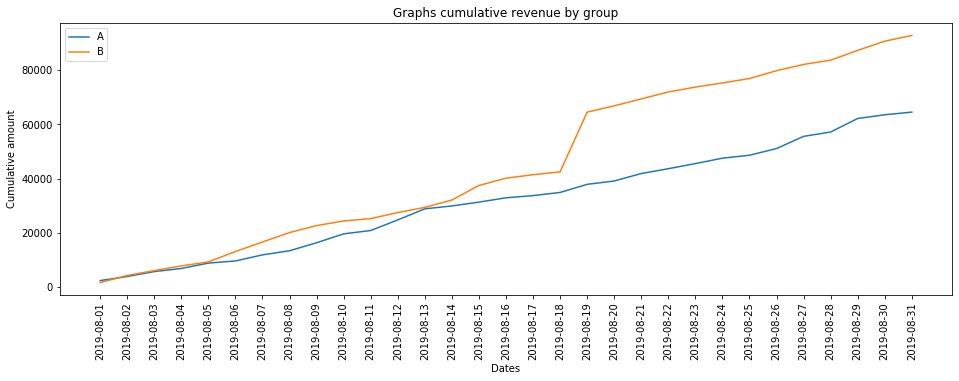

In [72]:
plt.figure(figsize=[16,5])
plt.locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

plt.plot(cumulative_revenue_a['date'], 
         cumulative_revenue_a['revenue'],                           
         label='A')

plt.plot(
         cumulative_revenue_b['date'],
         cumulative_revenue_b['revenue'], 
         label='B'
)

plt.title('Graphs cumulative revenue by group')
plt.ylabel('Cumulative amount')
plt.xlabel('Dates')
plt.legend()
plt.show()

> * Looking at the graph, we can tell that the marketing strategy works best for Group B starting August 18-19. Compared to group A.

- [X]  Graph cumulative average order size by group. Make conclusions and conjectures.

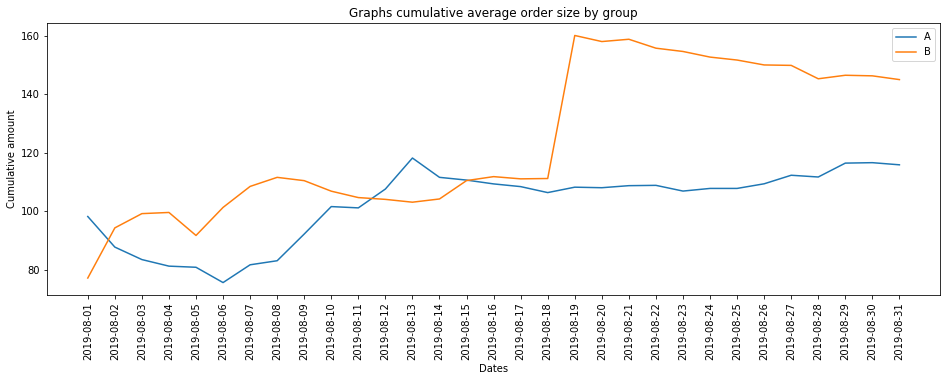

In [73]:
plt.figure(figsize=[16,5])
plt.locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

plt.plot(cumulative_revenue_a['date'], 
         cumulative_revenue_a['revenue'] / cumulative_revenue_a['orders'],                           
         label='A')

plt.plot(
         cumulative_revenue_b['date'],
         cumulative_revenue_b['revenue'] / cumulative_revenue_b['orders'],
         label='B'
)

plt.title('Graphs cumulative average order size by group')
plt.ylabel('Cumulative amount')
plt.xlabel('Dates')
plt.legend()
plt.show()

> * According to this graph, the average order size by group starts to differ, just like for the cumulative revenue graph for the group, August 18-19.

- [X]  Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.

In [74]:
# merge 2 DF's:
cumulative_revenue_merged = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', 
                                                   right_on='date', how='left', suffixes=['A', 'B'])

In [75]:
cumulative_revenue_merged.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,2356.8,24,1620.0,21
1,2019-08-02,3860.3,44,4243.8,45
2,2019-08-03,5675.5,68,6050.6,61
3,2019-08-04,6822.1,84,7767.9,78
4,2019-08-05,8810.2,109,9262.9,101


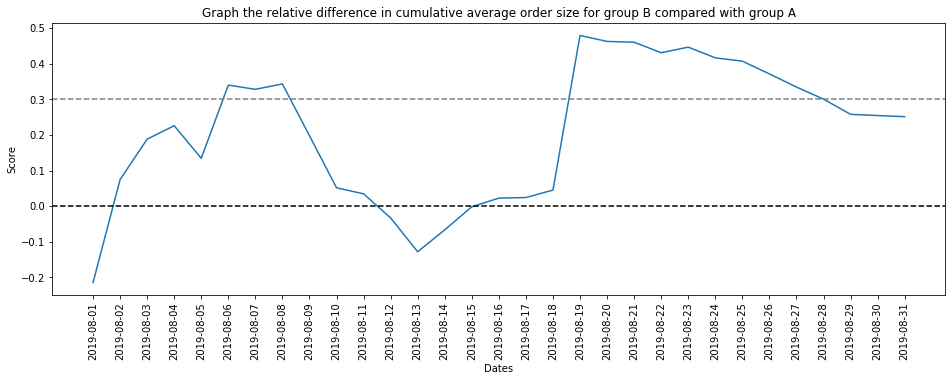

In [76]:
plt.figure(figsize=[16,5])
plt.plot(cumulative_revenue_merged['date'], 
        (cumulative_revenue_merged['revenueB']/ cumulative_revenue_merged['ordersB']) /
        (cumulative_revenue_merged['revenueA']/ cumulative_revenue_merged['ordersA']) - 1)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.3, color='grey', linestyle='--')

plt.title('Graph the relative difference in cumulative average order size for group B compared with group A')
plt.ylabel('Score')
plt.xlabel('Dates')
plt.show()

> * According to this graph, we can see that at several points the difference between the segments spikes. 
> * This means there must be some big orders and outliers for both groups actually, but a specialy for group B. Because we have very big changes in range from 05-08 of August and in 18-20 of August.

- [X] Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.

In [77]:
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845


In [78]:
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,2356.8,719,0.033380
1,2019-08-01,B,21,20,1620.0,713,0.029453
2,2019-08-02,A,44,38,3860.3,1338,0.032885
3,2019-08-02,B,45,43,4243.8,1294,0.034776
4,2019-08-03,A,68,62,5675.5,1845,0.036856


In [79]:
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']
cumulative_data_a.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,2356.8,719,0.033380
2,2019-08-02,A,44,38,3860.3,1338,0.032885
4,2019-08-03,A,68,62,5675.5,1845,0.036856
6,2019-08-04,A,84,77,6822.1,2562,0.032787
8,2019-08-05,A,109,100,8810.2,3318,0.032851


In [80]:
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']
cumulative_data_b.head()

,date,group,orders,buyers,revenue,visitors,conversion
1,2019-08-01,B,21,20,1620.0,713,0.029453
3,2019-08-02,B,45,43,4243.8,1294,0.034776
5,2019-08-03,B,61,59,6050.6,1803,0.033833
7,2019-08-04,B,78,75,7767.9,2573,0.030315
9,2019-08-05,B,101,98,9262.9,3280,0.030793


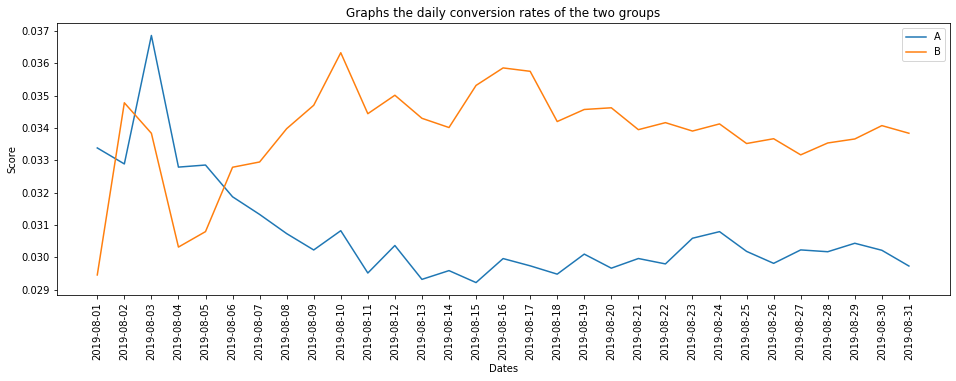

In [81]:
plt.figure(figsize=[16,5])
plt.plot(cumulative_data_a['date'], 
         cumulative_data_a['conversion'], 
         label='A')

plt.plot(cumulative_data_b['date'], 
         cumulative_data_b['conversion'], 
         label='B')

locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

plt.title('Graphs the daily conversion rates of the two groups')
plt.ylabel('Score')
plt.xlabel('Dates')
plt.legend()
plt.show()

> * According to the graph, the graphs are visible are not symmetrical.
> * The conversion rate of group B rose but not stabilizing. 
> * The conversion rate of group A dropped but then not stabilized, also.

In [82]:
cumulative_conversion_merged = cumulative_data_a.merge(cumulative_data_b, 
                                                       left_on='date', 
                                                       right_on='date', 
                                                       how='left', 
                                                       suffixes=['A', 'B'])

In [83]:
cumulative_conversion_merged.head()

,date,groupA,ordersA,buyersA,revenueA,visitorsA,conversionA,groupB,ordersB,buyersB,revenueB,visitorsB,conversionB
0,2019-08-01,A,24,20,2356.8,719,0.033380,B,21,20,1620.0,713,0.029453
1,2019-08-02,A,44,38,3860.3,1338,0.032885,B,45,43,4243.8,1294,0.034776
2,2019-08-03,A,68,62,5675.5,1845,0.036856,B,61,59,6050.6,1803,0.033833
3,2019-08-04,A,84,77,6822.1,2562,0.032787,B,78,75,7767.9,2573,0.030315
4,2019-08-05,A,109,100,8810.2,3318,0.032851,B,101,98,9262.9,3280,0.030793


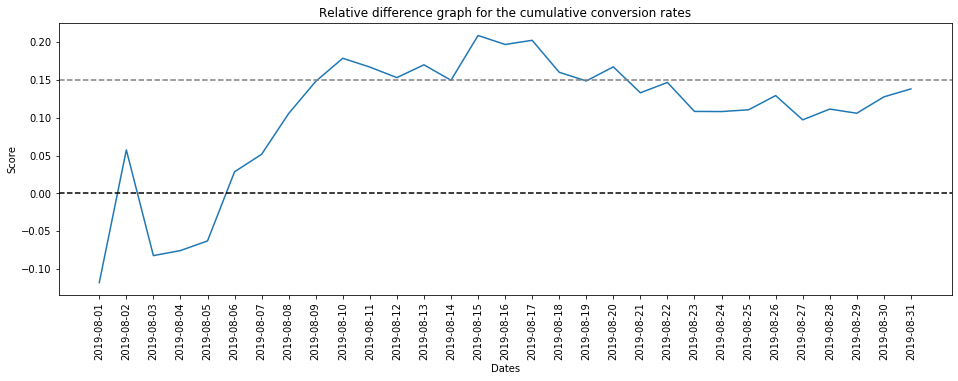

In [84]:
plt.figure(figsize=[16,5])
plt.plot(cumulative_conversion_merged['date'], 
        (cumulative_conversion_merged['conversionB'] / cumulative_conversion_merged['conversionA']) - 1)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')

plt.title('Relative difference graph for the cumulative conversion rates')
plt.ylabel('Score')
plt.xlabel('Dates')
plt.show()

> * At the beginning of the test, group B first made a sharp jump for 2 days. 
> * But then there was a rebound by one day and then continued to grow, continuing to fluctuate at an average of 0.15.
> * In general, the conversion ratio is not yet stable, so it's too early to draw conclusions about the test. 

<div class="alert alert-success">
<b>Reviewer's comment:</b> Excellent, all charts and conclusions are correct!
</div>

- [X] Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.

In [85]:
df_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [86]:
n_orders_user = df_orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
n_orders_user.columns = ['visitor_id','orders']

In [87]:
n_orders_user.head()

,visitor_id,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


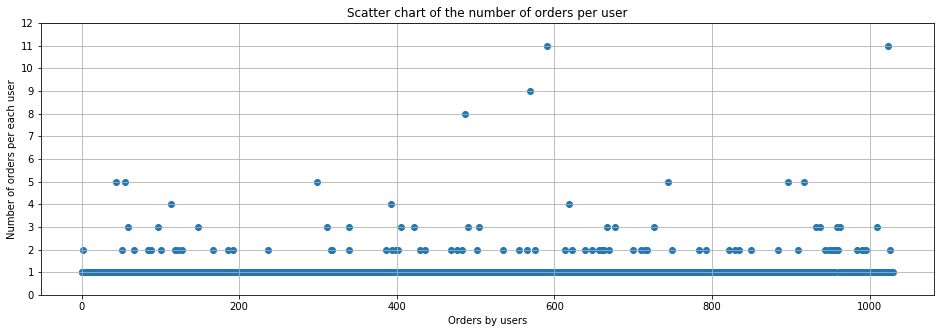

In [88]:
x_values = pd.Series(range(0,len(n_orders_user)))

plt.figure(figsize=[16,5])
plt.scatter(x_values, n_orders_user['orders']) 

plt.grid(True)
plt.title('Scatter chart of the number of orders per user')
plt.ylabel('Number of orders per each user')
plt.xlabel('Orders by users')
plt.yticks(np.arange(0, 13, step=1))
plt.show()

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Nice plot! You can improve it by coloring it in AB group colors:<br><a>https://moonbooks.org/Articles/How-to-create-a-scatter-plot-with-several-colors-in-matplotlib-/
</a> <br>That example based on the matplotlib. Alternatively, you can use <code>hue</code> parameter in the seaborn:<br> <a>https://seaborn.pydata.org/generated/seaborn.scatterplot.html</a>    
</div>

> * Just as we expected, there are several big orders. Based on the graph, we can set the limit for abnormal number of orders per user between 2 and 5. 
> * However, as a rule, the sharpest outliers of the observed values start at 8 orders per user.

- [X] Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

In [89]:
print(np.percentile(n_orders_user['orders'], [95])) 

[2.]


In [90]:
print(np.percentile(n_orders_user['orders'], [99])) 

[4.]


> * No more than 5% of users make more than 2 orders.
> * No more than 1% of users make more than 4 orders.
> * Thus, it would be reasonable to set two orders per user as the lower limit for the number of orders and to filter anomalies on that basis. 

<div class="alert alert-danger">
<b>Reviewer's comment:</b> Please, select abnormal point.
</div>

- [X] Plot a scatter chart of order prices. Make conclusions and conjectures.

In [91]:
df_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


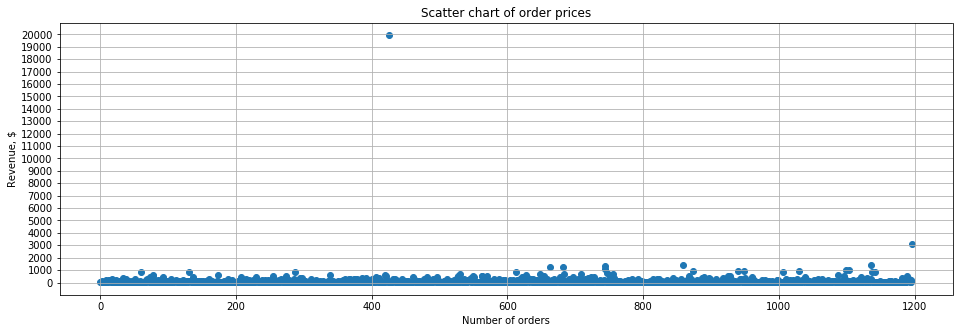

In [92]:
x_values = pd.Series(range(0,len(df_orders['revenue'])))

plt.figure(figsize=[16,5])
plt.scatter(x_values, df_orders['revenue']) 

plt.grid(True)
plt.title('Scatter chart of order prices')
plt.ylabel('Revenue, $')
plt.xlabel('Number of orders')
plt.yticks(np.arange(0, 21000, step=1000))
plt.show()

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Small tip: it's necessary to plot a similar scatter plot, but with a limited Y-axis. In this case, you will truncate outliers and get more dense picture.
You can align those plots side by side with plt.subplots: <a>https://pythonspot.com/matplotlib-subplot/</a>
</div>

> * Based on the graph, we can set the limit for abnormal orders started from 1000 revenue.

- [X] Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

In [93]:
print(np.percentile(df_orders['revenue'], [95])) 

[435.54]


In [94]:
print(np.percentile(df_orders['revenue'], [99])) 

[900.904]


> * No more than 5% of orders cost more than 435,54, and no more than 1% cost more than 900,904.
> * Thus, it would be reasonable to set $436 revenue as the lower limit for the revenue and to filter anomalies on that basis. 

<div class="alert alert-danger">
<b>Reviewer's comment:</b> The same issue. Please, select particular filtering point.
</div>


- [X]  Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.

In [95]:
df_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


Let us formulate hypotheses: (raw data)
 - H_0 (the null hypothesis): there's not a statistically significant difference in conversion between Group A and Group B;
 - H_a (the alternative hypothesis): there is a statistically significant difference in conversion between Group A and Group B;

In [96]:
orders_per_user_a = df_orders[df_orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
orders_per_user_a.columns = ['visitor_id', 'orders']

orders_per_user_b = df_orders[df_orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
orders_per_user_b.columns = ['visitor_id', 'orders']

In [97]:
orders_per_user_a.head()

,visitor_id,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [98]:
sample_a = pd.concat([orders_per_user_a['orders'],pd.Series(0, \
                    index=np.arange(df_visits[df_visits['group']=='A']['visits'].sum() - len(orders_per_user_a['orders'])), name='orders')],axis=0)

In [99]:
sample_b = pd.concat([orders_per_user_b['orders'],pd.Series(0, index=np.arange(df_visits[df_visits['group']=='B']['visits'].sum() - len(orders_per_user_b['orders'])), name='orders')],axis=0)

In [100]:
print("{0:.3f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))

0.008


<div class="alert alert-warning">
<b>Reviewer's comment:</b> Note, that you need to specify 'two-sided' type of alternative hypothesis for scipy version 1.4.1 (our server's version). Check this link: <a>https://docs.scipy.org/doc/scipy-1.4.1/reference/generated/scipy.stats.mannwhitneyu.html</a>
    
This issue is actual for every test.    
</div>

> * p-value, 0.008, which is less than 0.05 (0.008 < 0.05). So we can reject the null hypothesis: that there's not a statistically significant difference in conversion between the Group A and Group B.

- [X] Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.

Let us formulate hypotheses: (raw data)
 - H_0 (the null hypothesis): there is no statistically significant difference in average order size between Group A and Group B;
 - H_a (the alternative hypothesis): there is statistically significant difference in average order size between Group A and Group B;

In [101]:
orders_per_user_a.head()

,visitor_id,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [102]:
print("{0:.3f}".format(stats.mannwhitneyu(df_orders[df_orders['group']=='A']['revenue'], df_orders[df_orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(df_orders[df_orders['group']=='B']['revenue'].mean()/df_orders[df_orders['group']=='A']['revenue'].mean()-1)) 

0.346
0.252


> * The p-value 0.346 is considerably higher than 0.05, so there's no reason to reject the null hypothesis. 
> * But the relative profit of group B is 25.2%
> * Null hypothesis can't be rejected; there is no statistically significant difference in average order size between Group A and Group B

- [X]  Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

Let us formulate hypotheses: (filtered data)
 - H_0 (the null hypothesis): there is no statistically significant difference in conversion between Group A and Group B;
 - H_a (the alternative hypothesis): there is statistically significant difference in conversion between Group A and Group B;

In [103]:
# Let's take look again 95th percentiles for the number of orders per user:
print(np.percentile(n_orders_user['orders'], [95])) 

[2.]


In [104]:
# use this values for 
users_with_many_orders = pd.concat([orders_per_user_a[orders_per_user_a['orders'] > 2]['visitor_id'], orders_per_user_b[orders_per_user_b['orders'] > 2]['visitor_id']], axis = 0)
users_with_many_orders.head()

18      199603092
23      237748145
68      611059232
146    1230306981
189    1614305549
Name: visitor_id, dtype: int64

In [106]:
df_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [107]:
users_with_expensive_orders = df_orders[df_orders['revenue'] > 436]['visitorId']
abnormal_users = pd.concat([users_with_many_orders, users_with_expensive_orders], axis = 0).drop_duplicates().sort_values()
print(abnormal_users.head(5))
print(abnormal_users.shape)

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
(73,)


> * We have 73 anomalous users in total.

In [108]:
df_visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [109]:
sample_a_filtered = pd.concat([orders_per_user_a[np.logical_not(orders_per_user_a['visitor_id'].isin(abnormal_users))]['orders'],pd.Series(0, index=np.arange(df_visits[df_visits['group']=='A']['visits'].sum() - len(orders_per_user_a['orders'])),name='orders')],axis=0)
sample_b_filtered = pd.concat([orders_per_user_b[np.logical_not(orders_per_user_b['visitor_id'].isin(abnormal_users))]['orders'],pd.Series(0, index=np.arange(df_visits[df_visits['group']=='B']['visits'].sum() - len(orders_per_user_b['orders'])),name='orders')],axis=0)

In [110]:
print("{0:.3f}".format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
print("{0:.3f}".format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))

0.007
0.170


> * The first row of the output gives us the p-value, 0.007, which is less than 0.05. So we can reject the null hypothesis: there is no statistically significant difference in conversion between Group A and Group B;
> * The relative profit of group B is 17.0%.
> * The results for conversion changed.

- [X] Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.

Let us formulate hypotheses: (filtered data)
 - H_0 (the null hypothesis): there is no statistically significant difference in average order size between Group A and Group B;
 - H_a (the alternative hypothesis): there is statistically significant difference in average order size between Group A and Group B;

In [111]:
print('{0:.3f}'.format(stats.mannwhitneyu(
    df_orders[np.logical_and(
        df_orders['group']=='A',
        np.logical_not(df_orders['visitorId'].isin(abnormal_users)))]['revenue'],
    df_orders[np.logical_and(
        df_orders['group']=='B',
        np.logical_not(df_orders['visitorId'].isin(abnormal_users)))]['revenue'])[1]))

print('{0:.3f}'.format(
    df_orders[np.logical_and(df_orders['group']=='B',np.logical_not(df_orders['visitorId'].isin(abnormal_users)))]['revenue'].mean()/
    df_orders[np.logical_and(
        df_orders['group']=='A',
        np.logical_not(df_orders['visitorId'].isin(abnormal_users)))]['revenue'].mean() - 1))

0.372
-0.028


> * The p-value 0.372 is considerably higher than 0.05, so there's no reason to reject the null hypothesis. 
> * But the relative loss of group B is 2.8%. Not so big. 
> * Null hypothesis can't be rejected; there is no statistically significant difference in average order size between Group A and Group B
> * The p-value increased, but now the difference between the segments is 2.7% instead of 25.2%.


<div class="alert alert-success">
<b>Reviewer's comment:</b> Splendid, all tests are correct as well!
</div>

### Conclusion:

  - Here are the facts:
> * Neither raw nor filtered data revealed any statistically significant differences in average order size between the groups.
> * Both raw and filtered data revealed statistically significant differences in conversion rates between groups.
> * Based on these facts, we can conclude that the test passed and should be continued. It makes sense to continue it, since the probability that segment B will be better than segment A is present.


<div class="alert alert-success">
<b>Reviewer's comment:</b> Thank you for the reserach and deep conclusions!
</div>